In [1]:
# On va importer les bibliothèques requises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import re 
import nltk
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')


import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import dataset
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
# Creation d'une copie (le dataset "df_data" on va utiliser pendant la prediction )
df_data = df.copy()

In [4]:
df_data.shape

(1050, 15)

In [5]:
df_data.sample(5) # Vision globale

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
329,cb0afa31d9ca796908fde019cd64044d,2015-12-01 06:13:00 +0000,http://www.flipkart.com/asus-rt-ac68u-dual-ban...,Asus RT-AC68U Dual-band Wireless-AC1900 Gigabi...,"[""Computers >> Network Components >> Routers >...",RTRDRDPR9JHCSBGH,25000.0,13390.0,cb0afa31d9ca796908fde019cd64044d.jpg,False,Buy Asus RT-AC68U Dual-band Wireless-AC1900 Gi...,4.3,4.3,Asus,"{""product_specification""=>[{""key""=>""In The Box..."
761,294a26262643797cb07f72f1b55262ae,2015-12-12 11:46:53 +0000,http://www.flipkart.com/perucci-pc-301-analog-...,Perucci PC-301 Analog Watch - For Men,"[""Watches >> Wrist Watches >> Perucci Wrist Wa...",WATE3FAGH3DKJSFC,2500.0,1395.0,294a26262643797cb07f72f1b55262ae.jpg,False,Perucci PC-301 Analog Watch - For Men - Buy P...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
95,f4d4c2eec77732f56e47722d7a355f2b,2016-01-04 00:20:04 +0000,http://www.flipkart.com/exotic-india-blessing-...,Exotic India Blessing Buddha Showpiece - 36....,"[""Home Decor & Festive Needs >> Table Decor & ...",SHIE3QDGUEGVZJZ8,15000.0,15000.0,f4d4c2eec77732f56e47722d7a355f2b.jpg,False,Buy Exotic India Blessing Buddha Showpiece - ...,No rating available,No rating available,Exotic India,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
114,bc784846bd59a16832454416ac708003,2016-01-03 09:39:44 +0000,http://www.flipkart.com/lollipop-lane-tiddly-w...,Lollipop Lane Tiddly Wink Safari Bath Set,"[""Baby Care >> Baby Grooming >> Baby Grooming ...",BBCDPFZM6V585ZZE,2950.0,2950.0,bc784846bd59a16832454416ac708003.jpg,True,Flipkart.com is offering Lollipop Lane Tiddly ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Age Group""..."
572,2cbad7ead8eb8dd92823b9f525c87b9c,2016-01-07 05:50:25 +0000,http://www.flipkart.com/times-327tms327-party-...,Times 327TMS327 Party-Wedding Analog Watch - ...,"[""Watches >> Wrist Watches >> Times Wrist Watc...",WATE8PBFZKV5BYDZ,599.0,599.0,2cbad7ead8eb8dd92823b9f525c87b9c.jpg,False,Times 327TMS327 Party-Wedding Analog Watch - ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."


In [6]:
df_data.info() #Info:: 'Shape':dataset.shape, 'types':dataset.dtypes, 'NaN':dataset.isna().sum() et 'memory':sys.getsizeof(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [7]:
df_data['product_category_tree'].shape[0] # Observons la colonne "product_category_tree"

1050

In [8]:
df_data['product_category_tree'].nunique() # number unique valeurs

642

In [9]:
df_data['product_category_tree'].value_counts().head(10) # Les 10 premières lignes sont triées par ordre décroissant

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                  56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                    26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                           23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                  22
["Home Furnishing >> Bath Linen >> Towels"]                                    19
["Watches >> Wrist Watches >> Sonata Wrist Watches"]                           19
["Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs"]                   13
["Watches >> Wrist Watches >> Times Wrist Watches"]                            10
["Beauty and Personal Care >> Combos and Kits >> Oxyglow Combos and Kits"]     10
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]    10
Name: product_category_tree, dtype: int64

In [10]:
#Traitement des catégories (ov voit que il y a 3 catégories qui sont plus importantes )
def split_categories(category, level):

    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)

def detail_categories(dataframe):
    dataframe['category_general'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['category_classic'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['category_detailed'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [11]:
# data engineering 
df_data = detail_categories(df_data)

In [12]:
# Sauvegarde du dataframe 
df_data_1  = df_data.copy()


In [13]:
# Creation une autre colonne numérique de Target 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_data_1['CategoryId'] = le.fit_transform(df_data_1['category_general'])

In [14]:
df_data_1[['CategoryId','category_general']].value_counts()

CategoryId  category_general          
0           Baby Care                     150
1           Beauty and Personal Care      150
2           Computers                     150
3           Home Decor & Festive Needs    150
4           Home Furnishing               150
5           Kitchen & Dining              150
6           Watches                       150
dtype: int64

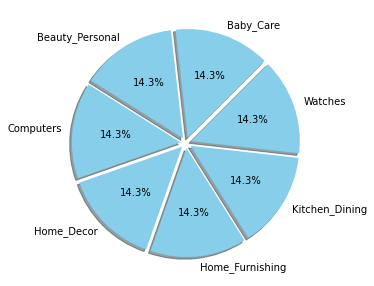

In [15]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
Baby_Care = df_data_1[df_data_1['CategoryId'] == 0 ]
Beauty_Personal = df_data_1[df_data_1['CategoryId'] == 1 ]
Computers = df_data_1[df_data_1['CategoryId'] == 2]
Home_Decor = df_data_1[df_data_1['CategoryId'] == 3]
Home_Furnishing = df_data_1[df_data_1['CategoryId'] == 4]
Kitchen_Dining  = df_data_1[df_data_1['CategoryId'] == 5 ]
Watches = df_data_1[df_data_1['CategoryId'] == 6 ]
count = [Baby_Care['CategoryId'].count(), Beauty_Personal['CategoryId'].count(), Computers['CategoryId'].count(), 
         Home_Decor['CategoryId'].count(), Home_Furnishing['CategoryId'].count(),
         Kitchen_Dining['CategoryId'].count(), Watches['CategoryId'].count()]
pie = plt.pie(count, labels = ['Baby_Care', 'Beauty_Personal', 'Computers', 'Home_Decor', 'Home_Furnishing','Kitchen_Dining','Watches'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05))

plt.savefig("mes_images/distrib_cat.png")

In [16]:
df_data_1.head(3) #vérification d'ajout de 3 nouvelles colonnes  

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_general,category_classic,category_detailed,CategoryId
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0


In [17]:
# Identification des targets avec les quantités dans la catégorie "general"
print(len(df_data_1.groupby('category_general').count()['uniq_id'].sort_values(ascending=False)),"category_general")
df_data_1.groupby('category_general').count()['uniq_id'].sort_values(ascending=False)

7 category_general


category_general
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64

In [18]:
# Identification des targets avec les quantités dans la catégorie "classic"
print(len(df_data_1.groupby('category_classic').count()['uniq_id'].sort_values(ascending=False)),"category_classic")
df_data_1.groupby('category_classic').count()['uniq_id'].sort_values(ascending=False).head(20)

62 category_classic


category_classic
Wrist Watches                  149
Laptop Accessories              87
Infant Wear                     84
Coffee Mugs                     74
Showpieces                      71
Bed Linen                       65
Fragrances                      65
Network Components              49
Cookware                        27
Table Decor & Handicrafts       27
Combos and Kits                 24
Wall Decor & Clocks             22
Bath Linen                      21
Curtains & Accessories          19
Makeup                          18
Baby & Kids Gifts               15
Body and Skin Care              15
Baby Bedding                    15
Baby Bath & Skin                14
Decorative Lighting & Lamps     14
Name: uniq_id, dtype: int64

In [19]:
# Identification des targets avec les quantités dans la catégorie "detailed"
print(len(df_data_1.groupby('category_detailed').count()['uniq_id'].sort_values(ascending=False)),"category_detailed")
df_data_1.groupby('category_detailed').count()['uniq_id'].sort_values(ascending=False).head(20)

242 category_detailed


category_detailed
Deodorants                     65
Blankets, Quilts & Dohars      57
Baby Girls' Clothes            49
Routers                        49
USB Gadgets                    38
Baby Boys' Clothes             35
Ethnic                         34
Prithish Coffee Mugs           26
Pots & Pans                    24
Maxima Wrist Watches           23
Showpieces                     23
Rockmantra Coffee Mugs         22
Batteries                      22
Sonata Wrist Watches           19
Curtains                       19
Towels                         19
Printland Coffee Mugs          13
Kitchen Implements             12
Cushion Covers                 12
Computer Accessories Combos    11
Name: uniq_id, dtype: int64

In [20]:
df_data_1.to_csv("dataset_categories.csv")

### Préparation des données

In [21]:
# La colonne principale 
df_data_1['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [22]:
df_data_1['description'][22]

'Franck Bella FB127A Analog Watch  - For Boys, Men - Buy Franck Bella FB127A Analog Watch  - For Boys, Men  FB127A Online at Rs.999 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!'

In [23]:
# Remplacons tous les non-mots et les nombres par un espace
def clean_text(text):
    text = re.sub('[^\w]+', ' ',text)
    text = re.sub('\w*\d\w*',' ', text)
    return text
df_data_1['description'] = df_data_1['description'].apply(lambda x: clean_text(x).lower())

In [24]:
df_data_1['description'][22]

'franck bella   analog watch for boys men buy franck bella   analog watch for boys men   online at rs   in india only at flipkart com great discounts only genuine products   day replacement guarantee free shipping cash on delivery '

In [25]:
# Remove all Stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    return [x for x in words if x not in stopwords.words("english")]

df_data_1['description'] = df_data_1['description'].apply(remove_stopwords)

In [26]:
print(df_data_1['description'][22])

['franck', 'bella', 'analog', 'watch', 'boys', 'men', 'buy', 'franck', 'bella', 'analog', 'watch', 'boys', 'men', 'online', 'rs', 'india', 'flipkart', 'com', 'great', 'discounts', 'genuine', 'products', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']


In [27]:
# Transformons en type string
df_data_1['description'] = df_data_1['description'].apply(lambda x: " ".join(x))

In [28]:
# La fréquence des mots
def count_freq():


    res = {}
    for i in df_data_1['description']:
        for k in word_tokenize(i):
            if k in res:
                res[k] += 1
            else:
                res[k] = 1
    return res
word_freq = count_freq()

print(len(word_freq))
word_freq

4905


{'key': 215,
 'features': 395,
 'elegance': 11,
 'polyester': 69,
 'multicolor': 160,
 'abstract': 51,
 'eyelet': 44,
 'door': 39,
 'curtain': 42,
 'floral': 63,
 'cm': 543,
 'height': 115,
 'pack': 317,
 'price': 352,
 'rs': 911,
 'enhances': 8,
 'look': 66,
 'interiors': 9,
 'made': 189,
 'high': 113,
 'quality': 245,
 'fabric': 211,
 'style': 110,
 'stitch': 2,
 'metal': 30,
 'ring': 7,
 'makes': 24,
 'room': 74,
 'environment': 4,
 'romantic': 1,
 'loving': 1,
 'ant': 5,
 'wrinkle': 3,
 'anti': 24,
 'shrinkage': 4,
 'elegant': 50,
 'apparance': 1,
 'give': 97,
 'home': 166,
 'bright': 17,
 'modernistic': 1,
 'appeal': 9,
 'designs': 48,
 'surreal': 1,
 'attention': 5,
 'sure': 38,
 'steal': 1,
 'hearts': 1,
 'contemporary': 13,
 'valance': 1,
 'curtains': 11,
 'slide': 2,
 'smoothly': 3,
 'draw': 4,
 'apart': 4,
 'first': 12,
 'thing': 3,
 'morning': 28,
 'welcome': 2,
 'sun': 5,
 'rays': 5,
 'want': 6,
 'wish': 5,
 'good': 40,
 'whole': 10,
 'world': 19,
 'close': 1,
 'evening': 4

In [29]:
# Tri de la type(dict)
sorted_values = sorted(word_freq.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in word_freq.keys():
        if word_freq[k] == i:
            sorted_dict[k] = word_freq[k]
            break

print(sorted_dict)

{'romantic': 1, 'stitch': 2, 'wrinkle': 3, 'environment': 4, 'ant': 5, 'want': 6, 'ring': 7, 'enhances': 8, 'interiors': 9, 'whole': 10, 'elegance': 11, 'first': 12, 'contemporary': 13, 'diwan': 14, 'packing': 15, 'cold': 16, 'bright': 17, 'right': 18, 'world': 19, 'scratch': 20, 'prints': 21, 'picture': 22, 'life': 23, 'makes': 24, 'cms': 25, 'small': 26, 'iron': 27, 'morning': 28, 'keep': 29, 'metal': 30, 'self': 31, 'around': 32, 'e': 33, 'gifting': 34, 'beauty': 35, 'colour': 36, 'washable': 37, 'sure': 38, 'door': 39, 'good': 40, 'series': 41, 'curtain': 42, 'flexible': 43, 'eyelet': 44, 'machine': 45, 'top': 46, 'dry': 47, 'designs': 48, 'used': 49, 'elegant': 50, 'abstract': 51, 'comfort': 52, 'yellow': 53, 'id': 54, 'mm': 55, 'bath': 56, 'bring': 57, 'stainless': 58, 'may': 60, 'case': 61, 'hand': 62, 'floral': 63, 'depth': 64, 'pink': 65, 'look': 66, 'get': 67, 'polyester': 69, 'red': 70, 'sheet': 71, 'kitchen': 72, 'tea': 73, 'room': 74, 'girls': 75, 'brown': 76, 'led': 77, '

In [30]:
mots_inutiles = [] # iutille a partir de 60
for i in range(len(word_freq)):
    if list(word_freq.values())[i]>=471:
        mots_inutiles.append(list(word_freq.keys())[i])
print(mots_inutiles) 

['cm', 'rs', 'products', 'buy', 'flipkart', 'com', 'genuine', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']


In [31]:
# Combine stopwords
stopwords_inutiles = set(mots_inutiles)
stopwords_nltk = set(stopwords.words("english"))
stopwords_combined =set.union(stopwords_nltk,stopwords_inutiles)  
print(list(stopwords_combined)[0:25])

['she', "mustn't", 'm', "hadn't", "needn't", 'whom', "haven't", 'will', 'i', 'this', 'myself', 'in', 'don', 'which', 'o', 'couldn', 'your', 'with', 'weren', 'ours', 'can', 'those', 'he', 'there', 'each']


In [32]:
# Lemmatisation
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

for index, row in df_data_1.iterrows():
    filter_sentence  = []
    sentence = row['description']
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stopwords_combined]
    for word in words:
        filter_sentence.append(lm.lemmatize(word))
    df_data_1.loc[index,'description'] = ' '.join(filter_sentence)

In [33]:
print(df_data_1['description'][22])

franck bella analog watch boy men franck bella analog watch boy men online india great discount


In [34]:
# Creation de "document terme matrice"
tf_idf_vectorizer = TfidfVectorizer(min_df=2) #objet du modèle de TF-IDF
tf_arr = tf_idf_vectorizer.fit_transform(df_data_1['description']) # transformation des mots
vocab_tf_idf = tf_idf_vectorizer.get_feature_names() # noms des colonnes de tf_idf

dtm = pd.DataFrame(tf_arr.toarray(), columns=vocab_tf_idf)
dtm.sample(3)

,aa,aapno,ability,able,abode,absorbency,absorbent,abstract,ac,accent,...,yet,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Trop de colonnes avec une mediane 0.0
dtm.describe()

,aa,aapno,ability,able,abode,absorbency,absorbent,abstract,ac,accent,...,yet,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000209,0.001345,0.000306,0.000719,0.000365,0.000189,0.001332,0.012540,0.001949,0.000367,...,0.004104,0.001070,0.000367,0.000598,0.000362,0.001034,0.000423,0.000169,0.000741,0.002013
std,0.004798,0.025439,0.008188,0.011640,0.008495,0.004459,0.020021,0.068258,0.018935,0.008584,...,0.026672,0.024571,0.008409,0.014786,0.007041,0.023682,0.010618,0.003881,0.016993,0.039271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.112354,0.553796,0.257807,0.195679,0.226498,0.124150,0.432397,0.668056,0.368557,0.233080,...,0.188059,0.599663,0.195485,0.441600,0.178468,0.543198,0.321520,0.090814,0.403308,1.000000


In [36]:
# On ajoute une ligne qui va présenter la quantité de zero en pourcentage
s=[]
for i in dtm.columns:
    s.append(sum(dtm[i]==0.0)*100/1050)
    
dtm.loc[1050] = s


In [37]:
dtm

,aa,aapno,ability,able,abode,absorbency,absorbent,abstract,ac,accent,...,yet,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176528,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.074036,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
# Supprimons les colonnes qui sont rempli moins que 2 %
dtm.drop(columns=[x for x in dtm.columns if dtm[x][1050]>98], inplace=True)

In [39]:
# Suppression de laligne avec les quantités 
dtm.drop(index=1050, inplace=True)

In [40]:
# Il nous reste 239 features
dtm.shape

(1050, 239)

In [41]:
# Regardons  les
dtm

,abstract,add,additional,also,analog,art,attractive,baby,back,bath,...,wear,weight,well,white,width,woman,year,yellow,yes,yet
0,0.176528,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.574669,...,0.0,0.000000,0.0,0.00000,0.070469,0.075160,0.00000,0.195986,0.076799,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.098363,...,0.0,0.037814,0.0,0.00000,0.036186,0.038594,0.04581,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.118751,0.000000,0.00000,0.000000,0.043139,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.034667,0.0,0.12323,0.099524,0.000000,0.00000,0.000000,0.036154,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1046,0.000000,0.0,0.0,0.073189,0.0,0.092374,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.065895,0.000000,0.00000,0.000000,0.000000,0.0
1047,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1048,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


# Feature engineering 

In [42]:
# On va essayer de trouver des relations cachées, invisibles (nombre de mots par paragraphe pour chaque produit)
df_data_1['num_words'] = df_data_1['description'].apply(lambda x: len(x))

In [43]:
df_data_1['num_words'] # nombre de mots

0       1051
1        380
2        913
3        719
4        914
        ... 
1045    1475
1046    1009
1047     143
1048      97
1049      75
Name: num_words, Length: 1050, dtype: int64

In [44]:
# On les regroupe avec les targets
df_data_1.groupby('category_general')['num_words'].agg('median')

category_general
Baby Care                     292.5
Beauty and Personal Care       73.5
Computers                      87.0
Home Decor & Festive Needs    157.5
Home Furnishing                91.0
Kitchen & Dining              407.5
Watches                       132.5
Name: num_words, dtype: float64

In [45]:
df_data_1['category_general'].unique() # les targets

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

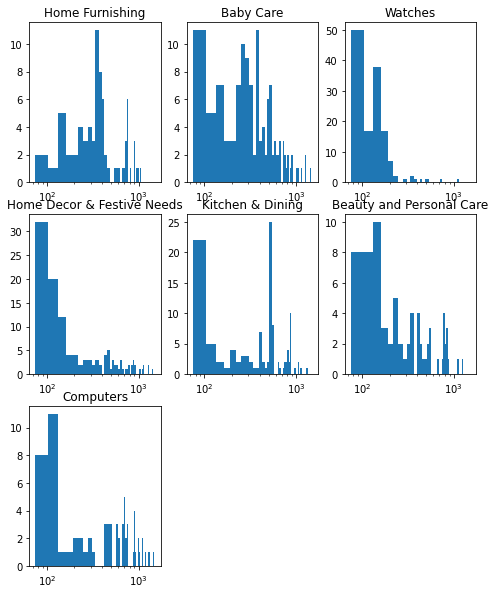

In [46]:
# Représentation graphique 
bins = np.linspace(75,1500,50)
count = 1
plt.figure(figsize=(8,10))
for i in df_data_1['category_general'].unique():

    plt.subplot(3,3,count)
    plt.title(i)
    plt.xscale(value='log')
    plt.hist(df_data_1[df_data_1['category_general'] ==i]['num_words'], bins);
    count +=1
plt.savefig('mes_images/num_words.png')    

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [48]:
# Normalisation
dtm['num_words'] = mms.fit_transform(df_data_1[['num_words']])

In [49]:
dtm['num_words'].sample(3)

534     0.029079
615     0.151050
1021    0.272617
Name: num_words, dtype: float64

# 

In [50]:
# On va observer le nombre des stopwords utilisés pour chaque article
df_data_1['num_stop_words'] = df['description'].apply(lambda x: len([x for x in word_tokenize(x) if x in stopwords_combined]))

In [51]:
df_data_1['num_stop_words']

0        67
1         4
2        42
3        14
4        38
       ... 
1045    161
1046    115
1047      7
1048      7
1049      7
Name: num_stop_words, Length: 1050, dtype: int64

In [52]:
# On les regroupe avec les targets
df_data_1.groupby('category_general')['num_stop_words'].agg('median')

category_general
Baby Care                     6.0
Beauty and Personal Care      3.5
Computers                     3.0
Home Decor & Festive Needs    9.0
Home Furnishing               3.0
Kitchen & Dining              9.0
Watches                       3.0
Name: num_stop_words, dtype: float64

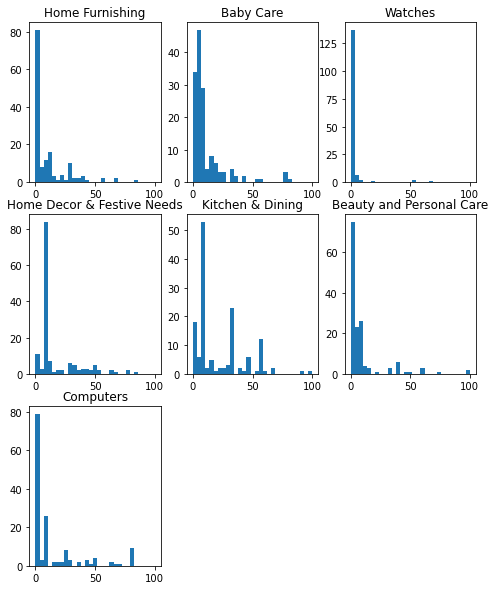

In [53]:
# Représentation graphique 
bins = np.linspace(0,100,30)
count = 1
plt.figure(figsize=(8,10))
for i in df_data_1['category_general'].value_counts().keys().tolist():

    plt.subplot(3,3,count)
    plt.title(i)
#     plt.xscale(value='log')
    plt.hist(df_data_1[df_data_1['category_general'] ==i]['num_stop_words'], bins);
    count +=1
plt.savefig('mes_images/num_stop_words.png')  

In [54]:
dtm['num_stop_words'] = mms.fit_transform(df_data_1[['num_stop_words']])

In [55]:
dtm['num_stop_words'].sample(3)

123    0.049451
34     0.043956
141    0.186813
Name: num_stop_words, dtype: float64

# 

In [56]:
import string
def ponctuation_num(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

In [57]:
df_data_1['ponctuation_%'] = df['description'].apply(lambda x: ponctuation_num(x))

In [58]:
df_data_1['ponctuation_%']

0       1.619718
1       2.252252
2       3.020668
3       1.631702
4       1.754386
          ...   
1045    2.713816
1046    2.469880
1047    3.816794
1048    2.857143
1049    3.208556
Name: ponctuation_%, Length: 1050, dtype: float64

In [59]:
df_data_1.groupby('category_general')['ponctuation_%'].agg('median')

category_general
Baby Care                     2.679768
Beauty and Personal Care      4.663338
Computers                     3.997603
Home Decor & Festive Needs    3.348893
Home Furnishing               4.152299
Kitchen & Dining              3.193918
Watches                       4.838710
Name: ponctuation_%, dtype: float64

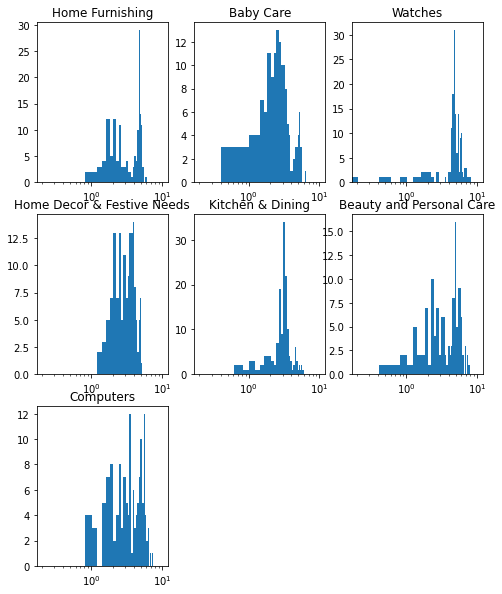

In [60]:
bins = np.linspace(0,10,50)
count = 1
plt.figure(figsize=(8,10))
for i in df_data_1['category_general'].unique():

    plt.subplot(3,3,count)
    plt.title(i)
    plt.xscale(value='log')
    plt.hist(df_data_1[df_data_1['category_general'] ==i]['ponctuation_%'], bins);
    count +=1
plt.savefig('mes_images/ponctuation.png')    

In [61]:
dtm['ponctuation_%'] = mms.fit_transform(df_data_1[['ponctuation_%']])


In [62]:
dtm['ponctuation_%'].sample(3)

52     0.307956
105    0.404167
408    0.141647
Name: ponctuation_%, dtype: float64

# 

###  DTM

In [63]:
df['description'][0] # Observons le premier article dans la DTM

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [64]:
dtm.T[dtm.T[0] !=0.0][0].sort_values(ascending=False).head(10) # Le pourcentage le plus élevé pour le premier article 

curtain           0.569146
num_words         0.422456
num_stop_words    0.368132
polyester         0.292820
abstract          0.176528
multicolor        0.148005
ponctuation_%     0.147293
elegant           0.096886
room              0.094859
pack              0.083567
Name: 0, dtype: float64

In [65]:
dtm[dtm['curtain'] !=0.0]['curtain'].index.values # pour toutes ces lignes le pourcentage du mot "curtain" est le plus élevé 

array([   0,  626,  650,  653,  659,  660,  662,  663,  674,  676,  824,
        953,  962, 1017, 1020, 1022, 1026, 1027, 1029, 1033, 1037],
      dtype=int64)

In [66]:
# On a le même target
df_data_1[df_data_1.index.isin(dtm[dtm['curtain'] !=0.0]['curtain'].index.values)][['category_general','num_words']]

,category_general,num_words
0,Home Furnishing,1051
626,Home Furnishing,769
650,Home Furnishing,63
653,Home Furnishing,55
659,Home Furnishing,58
660,Home Furnishing,307
662,Home Furnishing,414
663,Home Furnishing,63
674,Home Furnishing,62
676,Home Furnishing,68


# 

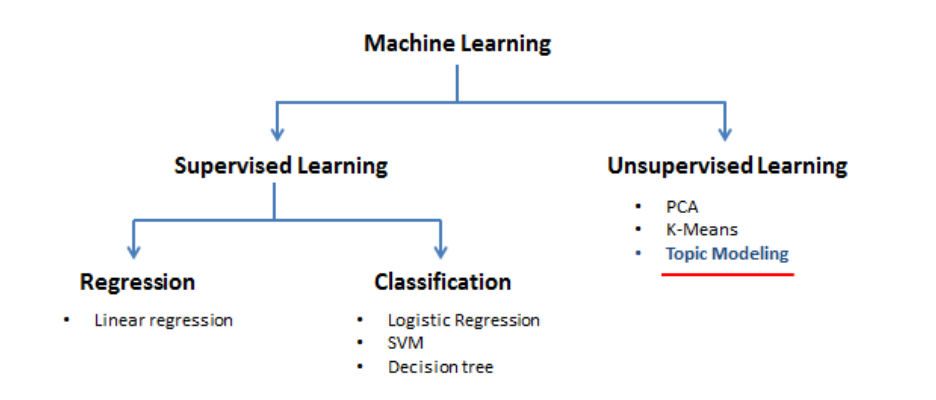

# Modelisation non supervisées

### PCA

In [67]:
from scipy.stats import skew,kurtosis

In [68]:
data = dtm.copy()

#### Tukey transformation

abstract
5.819189327437544
add
6.483879177905638
additional
4.400506886094957
also
5.010798888176437
analog
2.6536832767427985
art
9.852281173921027
attractive
9.084350771840096
baby
3.711099873708493
back
6.610567971386635
bath
8.132535275114988
battery
6.489607545259183
beautiful
7.125756680121997
beautifully
8.89731589911628
best
2.916179633354914
black
4.928305802088687
blanket
6.260011942360761
bleach
6.453738369319664
blue
5.027520735559011
body
14.25617546136147
bottle
9.457899167419837
box
4.763937128910743
boy
4.350610509250667
brand
2.8955260565490297
brass
8.296236667472614
brown
6.634780078082884
buckle
6.4239488585460744
capacity
5.860909673419039
care
5.299699013066528
case
5.62495383593909
casual
6.96446425368685
cell
7.830655330948103
ceramic
4.419957528583198
clasp
5.694846466136165
clean
6.62792022240762
code
5.649112879354427
coffee
6.998055839124818
collection
10.449129726015087
color
3.332048806485286
colour
7.9736735996197075
combo
4.196054297966366
come
6.0418845

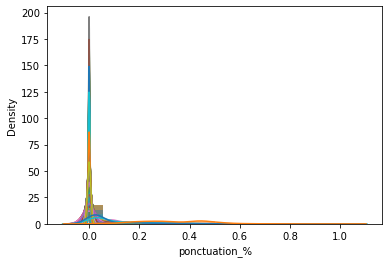

In [69]:
# Nos données  sont trop asymétrique 
plt.figure()
for col in data.columns:
#     plt.figure()
    print(col)
    print(skew(data[col]))
    sns.distplot(data[col], bins=np.linspace(0,0.5,10));
plt.savefig('mes_images/data_trans_avant.png')

In [70]:
# Transformation des donnes vers distribution normale
rest = 10e-8
for i in data.columns:
    data[i] = data[i].apply(lambda x:  np.log(x+rest))  
    

abstract
4.5963456599981605
add
5.209194500151984
additional
3.1035331064397673
also
3.542986971997769
analog
2.2747767169672017
art
6.276520486758678
attractive
6.395363415846541
baby
2.802014357955022
back
4.917460411525759
bath
5.809476919461493
battery
4.60976736762763
beautiful
4.840753164186804
beautifully
6.5415069428642765
best
1.4777195852886873
black
3.395627026126087
blanket
5.87762174216531
bleach
5.29123751826596
blue
3.7539755990011687
body
3.5221141012290045
bottle
6.739169749126922
box
1.2331336014876615
boy
3.0210267150382113
brand
1.5285422304054843
brass
5.387274367604054
brown
5.305950803362199
buckle
6.247893306315237
capacity
4.972946197824849
care
2.8036533223238984
case
4.412753952638185
casual
3.865042308367418
cell
6.404575801373961
ceramic
3.1604800907136514
clasp
5.559650684361311
clean
5.050462049089266
code
3.825505245933422
coffee
5.384659693897491
collection
6.272708425098116
color
1.3689009985247047
colour
5.053779639502361
combo
2.843785262306182
come


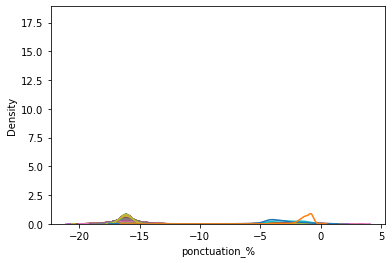

In [71]:
plt.figure()
for col in data.columns:
#     plt.figure()
    print(col)
    print(skew(data[col]))
    sns.distplot(data[col], bins=np.linspace(0,0.5,10));
plt.savefig('mes_images/data_trans_apres.png')    

In [72]:
# Standartisation
std = StandardScaler()
X_norm=std.fit_transform(data)
X_norm = pd.DataFrame(X_norm,columns=dtm.columns)
X_norm.sample(3)


,abstract,add,additional,also,analog,art,attractive,baby,back,bath,...,white,width,woman,year,yellow,yes,yet,num_words,num_stop_words,ponctuation_%
567,-0.208786,-0.185585,-0.29469,-0.263019,2.695546,-0.15594,-0.152868,-0.32065,-0.196124,-0.168113,...,-0.208929,-0.322368,3.673850,-0.19881,-0.159117,-0.273081,-0.159268,-0.200309,-0.357008,0.528372
894,4.567369,-0.185585,-0.29469,-0.263019,-0.377391,-0.15594,-0.152868,-0.32065,-0.196124,-0.168113,...,4.723931,-0.322368,-0.284805,-0.19881,-0.159117,-0.273081,-0.159268,0.020816,-0.205887,0.576638
791,-0.208786,-0.185585,-0.29469,-0.263019,-0.377391,-0.15594,-0.152868,-0.32065,-0.196124,-0.168113,...,-0.208929,-0.322368,-0.284805,-0.19881,-0.159117,-0.273081,-0.159268,-0.200309,0.088084,-0.276225


# ACP

In [73]:
pca=PCA(n_components=0.95)
pca.fit(X_norm)


PCA(n_components=0.95)

In [74]:
# Determination de nombre des colonnes nécessaires
pca_projection = pca.transform(X_norm)
print(f"avec {pca_projection.shape[1]} colonnes nous atteindrons 95% du résultat")

avec 138 colonnes nous atteindrons 95% du résultat


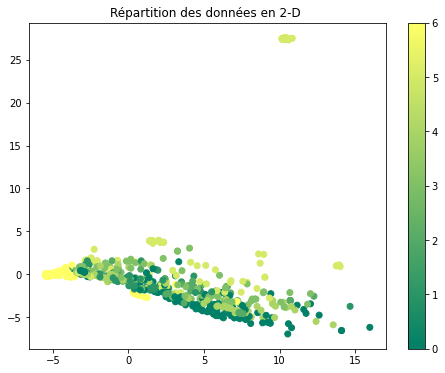

In [75]:
# Répartition des données en 2-D
plt.figure(figsize=(8,6))
plt.scatter(pca_projection[:,0],pca_projection[:,1], c=LabelEncoder().fit_transform(df_data_1.get('category_general')), cmap='summer')
plt.title('Répartition des données en 2-D ')
plt.colorbar()
plt.savefig('mes_images/data_PCA.png')

In [76]:
# Les 10 features avec les meilleures scores
loading_scores = pd.Series(pca.components_[0],index=X_norm.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10_features = sorted_loading_scores[0:10].index.values
print(top_10_features)

['specification' 'feature' 'general' 'sale' 'package' 'key' 'type'
 'number' 'box' 'material']


In [77]:
sorted_loading_scores

specification    0.179005
feature          0.172514
general          0.159378
sale             0.157826
package          0.157510
                   ...   
sticker          0.002411
black            0.002146
single           0.001615
round            0.000690
double           0.000114
Length: 242, dtype: float64

In [78]:
# Nouveau dataset avec la dimension 1050,138
new_data = dtm[sorted_loading_scores.index.values[:pca_projection.shape[1]]]


In [79]:
new_data.shape

(1050, 138)

# K-means

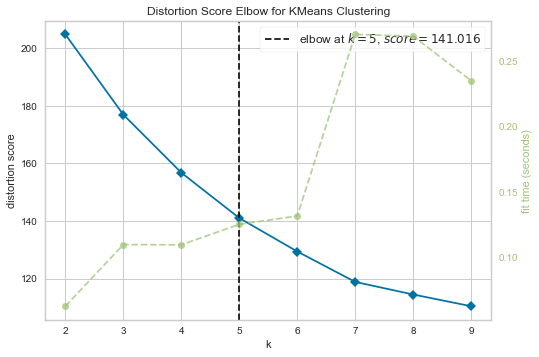

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model_yellow = KMeans(random_state=2)
visualizer = KElbowVisualizer(model_yellow, k=(2,10))

visualizer.fit(new_data)    
visualizer.poof() 

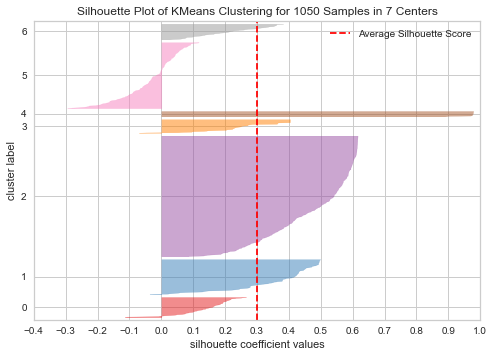

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1050 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [81]:
model_yellow = KMeans(7)
visualizer = SilhouetteVisualizer(model_yellow)

visualizer.fit(new_data)    
visualizer.poof()  

In [82]:
# On va prendre 7 clusters
km1=KMeans(n_clusters=7)
# Fitting les donées
km1.fit(new_data)
# Label
y=km1.predict(new_data)


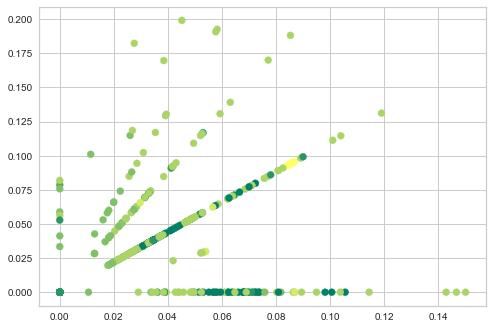

In [83]:
plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=y, cmap='summer')
plt.savefig('mes_images/label_km.png')

In [84]:
# ajoutons les labels
df_data_1["label"] = y
df_data_1.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,brand,product_specifications,category_general,category_classic,category_detailed,CategoryId,num_words,num_stop_words,ponctuation_%,label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,key feature elegance polyester multicolor abst...,...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4,1051,67,1.619718,3
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,specification sathiyas cotton bath towel bath ...,...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0,380,4,2.252252,4


In [85]:
# La distribution les labels dans notre dataframe
df_data_1["label"].value_counts()

1    456
4    241
2    133
0     77
3     70
5     52
6     21
Name: label, dtype: int64

In [86]:
# La vision plus détaillée 
for i in range(7):
#     print("=="*50)
    print(df_data_1[df_data_1['label'] == i][['label','category_general']].value_counts())
    print("-"*50)

label  category_general
0      Baby Care           77
dtype: int64
--------------------------------------------------
label  category_general          
1      Beauty and Personal Care      105
       Computers                      97
       Home Decor & Festive Needs     86
       Home Furnishing                85
       Baby Care                      41
       Kitchen & Dining               40
       Watches                         2
dtype: int64
--------------------------------------------------
label  category_general
2      Watches             133
dtype: int64
--------------------------------------------------
label  category_general          
3      Computers                     21
       Home Decor & Festive Needs    17
       Baby Care                      9
       Kitchen & Dining               8
       Beauty and Personal Care       6
       Home Furnishing                6
       Watches                        3
dtype: int64
--------------------------------------------------


# AgglomerativeClustering 

0.23 n_cluster is : 2
0.26 n_cluster is : 3
0.28 n_cluster is : 4
0.3 n_cluster is : 5
0.3 n_cluster is : 5
0.3 n_cluster is : 5
0.3 n_cluster is : 5


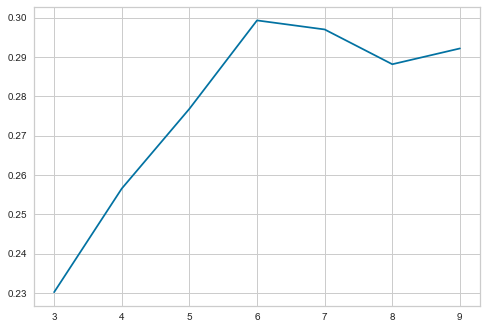

In [87]:
def calcul_silhouette(df,n_clusters):
    k_range = range(3,n_clusters)
    silhouette = []
    for i in k_range:
        hc = AgglomerativeClustering(n_clusters=i).fit(df)
        silhouette.append(silhouette_score(df,hc.labels_))
        print(np.round(np.max(silhouette),2),"n_cluster is :",np.argmax(silhouette)+2)
    return(silhouette) 
n_clusters = 10
silhouettes = calcul_silhouette(new_data,n_clusters)
plt.plot(range(3,n_clusters),silhouettes)

In [88]:
# On va prendre pour 7 clusters
hc=AgglomerativeClustering(n_clusters=7)
pred_hc = hc.fit_predict(new_data)
silhouette_score(new_data,hc.labels_)

0.29698787308527125

In [89]:
# On va prendre 7 clusters
hc1=AgglomerativeClustering(n_clusters=7)
# Fitting les donées
hc1.fit(new_data)
# Label
y_hc=hc1.labels_


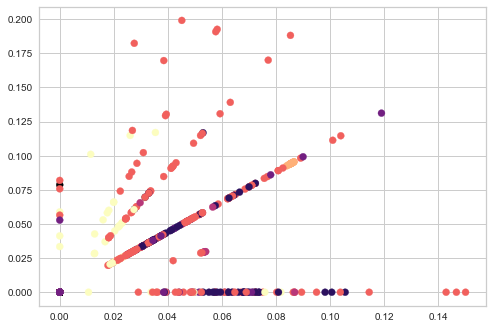

In [90]:
plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=y_hc, cmap='magma')
plt.savefig('mes_images/label_hc.png')

In [91]:
# ajoutons les labels

df_data_1["label_hc"] = y_hc
df_data_1.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,product_specifications,category_general,category_classic,category_detailed,CategoryId,num_words,num_stop_words,ponctuation_%,label,label_hc
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,key feature elegance polyester multicolor abst...,...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4,1051,67,1.619718,3,6
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,specification sathiyas cotton bath towel bath ...,...,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0,380,4,2.252252,4,4


In [92]:
# La distibution
df_data_1["label_hc"].value_counts()

2    479
4    219
0    134
1     75
6     68
3     54
5     21
Name: label_hc, dtype: int64

In [93]:
# Vision plus détaillée 
for i in range(7):
#     print("=="*50)
    print(df_data_1[df_data_1['label_hc'] == i][['label_hc','category_general']].value_counts())
    print("-"*50)

label_hc  category_general
0         Watches             134
dtype: int64
--------------------------------------------------
label_hc  category_general
1         Baby Care           75
dtype: int64
--------------------------------------------------
label_hc  category_general          
2         Beauty and Personal Care      109
          Computers                      99
          Home Furnishing                93
          Home Decor & Festive Needs     87
          Baby Care                      46
          Kitchen & Dining               44
          Watches                         1
dtype: int64
--------------------------------------------------
label_hc  category_general
3         Kitchen & Dining    53
          Baby Care            1
dtype: int64
--------------------------------------------------
label_hc  category_general          
4         Home Furnishing               51
          Home Decor & Festive Needs    48
          Beauty and Personal Care      35
          Computers

# DBscan

In [94]:
# On va entraîner le modele
model_dbscan = DBSCAN(eps=0.4,min_samples=8)
model_dbscan.fit(new_data)
y_dbscan = model_dbscan.labels_
   

In [95]:
silhouette_score(new_data,y_dbscan)
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)
print('number of clusters is',n_clusters_ )
print('number of noises is',n_noise_ )


number of clusters is 7
number of noises is 155


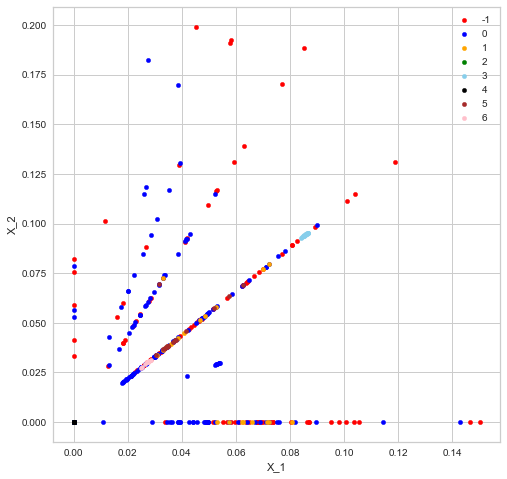

In [96]:
def show_cluster(X, cluster):
    df=pd.DataFrame(dict(x=X.iloc[:,0], y=X.iloc[:,1], label=y_dbscan))
    colors={-1:'red', 0:'blue', 1:'orange', 2:'green',3:'skyblue',4:'black',5:'brown',6:'pink'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped=df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax,kind='scatter', x='x',  y='y',label=key, color=colors[key])
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.savefig('mes_images/label_dbscan.png')
show_cluster(new_data, y_dbscan) 


In [97]:
# ajoutons les labels
df_data_1["label_dbscan"] = y_dbscan
df_data_1.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,category_general,category_classic,category_detailed,CategoryId,num_words,num_stop_words,ponctuation_%,label,label_hc,label_dbscan
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,key feature elegance polyester multicolor abst...,...,Home Furnishing,Curtains & Accessories,Curtains,4,1051,67,1.619718,3,6,0
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,specification sathiyas cotton bath towel bath ...,...,Baby Care,Baby Bath & Skin,Baby Bath Towels,0,380,4,2.252252,4,4,0


In [98]:
df_data_1["label_dbscan"].value_counts()

 0    808
-1    155
 1     21
 3     21
 5     15
 4     12
 6     10
 2      8
Name: label_dbscan, dtype: int64

In [99]:
# La vision plus détaillée 
for i in range(7):
#     print("=="*50)
    print(df_data_1[df_data_1['label_dbscan'] == i][['label_dbscan','category_general']].value_counts())
    print("-"*50)

label_dbscan  category_general          
0             Beauty and Personal Care      139
              Computers                     135
              Watches                       133
              Home Decor & Festive Needs    130
              Home Furnishing               113
              Kitchen & Dining               99
              Baby Care                      59
dtype: int64
--------------------------------------------------
label_dbscan  category_general
1             Baby Care           21
dtype: int64
--------------------------------------------------
label_dbscan  category_general
2             Kitchen & Dining    8
dtype: int64
--------------------------------------------------
label_dbscan  category_general
3             Kitchen & Dining    21
dtype: int64
--------------------------------------------------
label_dbscan  category_general
4             Kitchen & Dining    12
dtype: int64
--------------------------------------------------
label_dbscan  category_general
5

# LatentDirichletAllocation

In [100]:
# Creation du modèle LDA
lda = LatentDirichletAllocation(
        n_components = df_data_1['category_general'].nunique(), 
        max_iter=15, 
        random_state=2)

In [101]:
matrix_lda = lda.fit_transform(dtm.iloc[:,:-3])# on va extraire des sujets avec tf-idf


In [102]:
# Affichage les Topics tf-idf
def display_topics(model, feature_names, top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))

top_words = 10
display_topics(lda, dtm.columns[:-3], top_words)

Topic 0:
set combo online skin brass towel bottle laptop shape showpiece
Topic 1:
watch analog men india discount great woman online dial sonata
Topic 2:
showpiece usb best blanket led abstract price online light bath
Topic 3:
mug ceramic coffee prithish steel perfect get home gift love
Topic 4:
cushion cover warranty sheet battery collection covered laptop quality power
Topic 5:
kadhai quilt single comforter sticker curtain best price floral multicolor
Topic 6:
baby cotton pack girl color detail specification box feature type


In [103]:
#  topic distribution
topic_words_tf_idf = lda.components_

In [104]:
# Obtaining topics et respectives words present in those topics tf-idf
n_top_words = 8
for i, topic_dist in enumerate(topic_words_tf_idf):
    sorted_topic_dist_tf_idf = np.argsort(topic_dist) # sorting un array acc of their values
    topic_words_tf_idf = np.array(dtm.columns)[sorted_topic_dist_tf_idf] # view words in those indexes
    topic_words_tf_idf = topic_words_tf_idf[:-n_top_words:-1]
    print("Topic",str(i), topic_words_tf_idf)

Topic 0 ['set' 'combo' 'online' 'skin' 'brass' 'towel' 'bottle']
Topic 1 ['watch' 'analog' 'men' 'india' 'discount' 'great' 'woman']
Topic 2 ['showpiece' 'usb' 'best' 'blanket' 'led' 'abstract' 'price']
Topic 3 ['mug' 'ceramic' 'coffee' 'prithish' 'steel' 'perfect' 'get']
Topic 4 ['cushion' 'cover' 'warranty' 'sheet' 'battery' 'collection' 'covered']
Topic 5 ['kadhai' 'quilt' 'single' 'comforter' 'sticker' 'curtain' 'best']
Topic 6 ['baby' 'cotton' 'pack' 'girl' 'color' 'detail' 'specification']


In [105]:

# Correspondance des categories et topics
doc_topic = lda.transform(dtm.iloc[:,:-3])
k = 0
for n in range(doc_topic.shape[0]):
    topic_doc = doc_topic[n].argmax()
    print("Product",n+1,"--",df_data_1['category_general'][n],"(Cat",df_data_1['CategoryId'][n],")"," -------- Topic", topic_doc)
    

Product 1 -- Home Furnishing (Cat 4 )  -------- Topic 6
Product 2 -- Baby Care (Cat 0 )  -------- Topic 6
Product 3 -- Baby Care (Cat 0 )  -------- Topic 6
Product 4 -- Home Furnishing (Cat 4 )  -------- Topic 6
Product 5 -- Home Furnishing (Cat 4 )  -------- Topic 6
Product 6 -- Watches (Cat 6 )  -------- Topic 1
Product 7 -- Watches (Cat 6 )  -------- Topic 1
Product 8 -- Watches (Cat 6 )  -------- Topic 3
Product 9 -- Watches (Cat 6 )  -------- Topic 1
Product 10 -- Watches (Cat 6 )  -------- Topic 1
Product 11 -- Watches (Cat 6 )  -------- Topic 6
Product 12 -- Watches (Cat 6 )  -------- Topic 1
Product 13 -- Watches (Cat 6 )  -------- Topic 1
Product 14 -- Watches (Cat 6 )  -------- Topic 1
Product 15 -- Watches (Cat 6 )  -------- Topic 1
Product 16 -- Watches (Cat 6 )  -------- Topic 1
Product 17 -- Watches (Cat 6 )  -------- Topic 1
Product 18 -- Watches (Cat 6 )  -------- Topic 1
Product 19 -- Watches (Cat 6 )  -------- Topic 1
Product 20 -- Watches (Cat 6 )  -------- Topic 1
P

Product 233 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 0
Product 234 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 2
Product 235 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 236 -- Kitchen & Dining (Cat 5 )  -------- Topic 3
Product 237 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 238 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 239 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 240 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 0
Product 241 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 242 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 243 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 244 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 245 -- Kitchen & Dining (Cat 5 )  -------- Topic 3
Product 246 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 247 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Product 248 -- Kitchen & Dining (Cat 5 )  -------- Topic 5
Produc

Product 400 -- Computers (Cat 2 )  -------- Topic 0
Product 401 -- Computers (Cat 2 )  -------- Topic 0
Product 402 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 403 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 404 -- Computers (Cat 2 )  -------- Topic 0
Product 405 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 406 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 407 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 408 -- Computers (Cat 2 )  -------- Topic 3
Product 409 -- Beauty and Personal Care (Cat 1 )  -------- Topic 6
Product 410 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 411 -- Computers (Cat 2 )  -------- Topic 2
Product 412 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 413 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 414 -- Computers (Cat 2 )  -------- Topic 0
Product 415 -- Beauty and Personal Care (Cat 1 )  -------- Topic 0
Product 416 -- Bea

Product 612 -- Home Furnishing (Cat 4 )  -------- Topic 6
Product 613 -- Baby Care (Cat 0 )  -------- Topic 6
Product 614 -- Baby Care (Cat 0 )  -------- Topic 6
Product 615 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 616 -- Baby Care (Cat 0 )  -------- Topic 6
Product 617 -- Baby Care (Cat 0 )  -------- Topic 6
Product 618 -- Baby Care (Cat 0 )  -------- Topic 6
Product 619 -- Baby Care (Cat 0 )  -------- Topic 6
Product 620 -- Baby Care (Cat 0 )  -------- Topic 6
Product 621 -- Baby Care (Cat 0 )  -------- Topic 6
Product 622 -- Baby Care (Cat 0 )  -------- Topic 6
Product 623 -- Baby Care (Cat 0 )  -------- Topic 6
Product 624 -- Baby Care (Cat 0 )  -------- Topic 6
Product 625 -- Baby Care (Cat 0 )  -------- Topic 6
Product 626 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 627 -- Home Furnishing (Cat 4 )  -------- Topic 6
Product 628 -- Beauty and Personal Care (Cat 1 )  -------- Topic 6
Product 629 -- Kitchen & Dining (Cat 5 )  -------- Topi

Product 900 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 901 -- Beauty and Personal Care (Cat 1 )  -------- Topic 6
Product 902 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 903 -- Kitchen & Dining (Cat 5 )  -------- Topic 6
Product 904 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 905 -- Baby Care (Cat 0 )  -------- Topic 6
Product 906 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 907 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 908 -- Baby Care (Cat 0 )  -------- Topic 6
Product 909 -- Baby Care (Cat 0 )  -------- Topic 6
Product 910 -- Baby Care (Cat 0 )  -------- Topic 6
Product 911 -- Baby Care (Cat 0 )  -------- Topic 6
Product 912 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 913 -- Home Decor & Festive Needs (Cat 3 )  -------- Topic 6
Product 914 -- Watches (Cat 6 )  -------- Topic 6
Product 915 -- Baby Care (Cat 0 )  -------- Topic 6
Product 916 -- Baby Care (Cat

# Le module de nuage

In [106]:
df_data_1[['category_general','CategoryId']].value_counts() # Correspondance Categorie et Id

category_general            CategoryId
Baby Care                   0             150
Beauty and Personal Care    1             150
Computers                   2             150
Home Decor & Festive Needs  3             150
Home Furnishing             4             150
Kitchen & Dining            5             150
Watches                     6             150
dtype: int64

In [107]:
# Utilisons le module de nuage de mots pour afficher les mots liés à la catégorie

from wordcloud import WordCloud
stop = stopwords_combined

Baby = df_data_1[df_data_1['CategoryId'] == 0]
Baby = Baby['description']

Beauty = df_data_1[df_data_1['CategoryId'] == 1]
Beauty = Beauty['description']

Computers = df_data_1[df_data_1['CategoryId'] == 2]
Computers = Computers['description']

Decor = df_data_1[df_data_1['CategoryId'] == 3]
Decor = Decor['description']

Furnishing = df_data_1[df_data_1['CategoryId'] == 4]
Furnishing = Furnishing['description']

Kitchen = df_data_1[df_data_1['CategoryId'] == 5]
Kitchen = Kitchen['description']

Watches = df_data_1[df_data_1['CategoryId'] == 6]
Watches = Watches['description']

def wordcloud_draw(df_data_1, color = 'white'):
    words = ' '.join(df_data_1)
    cleaned_word = ' '.join([word for word in words.split()
    if (word != 'products' and word != 'price')])
    wordcloud = WordCloud(stopwords = stop, background_color = color, width = 2246, height = 1050).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()



Baby related words:


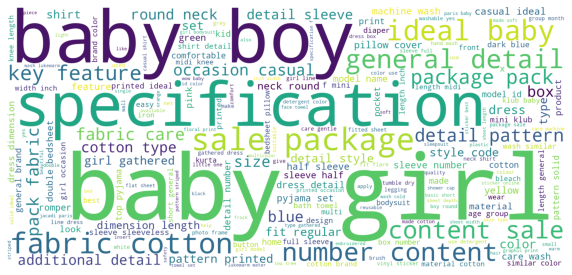

Beauty related words:


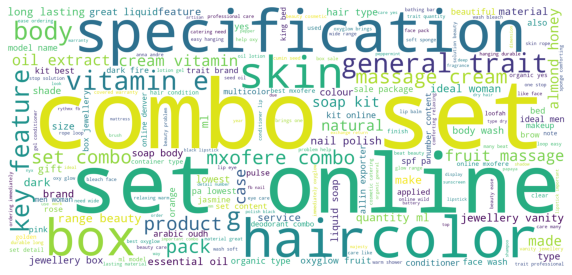

Computers related words:


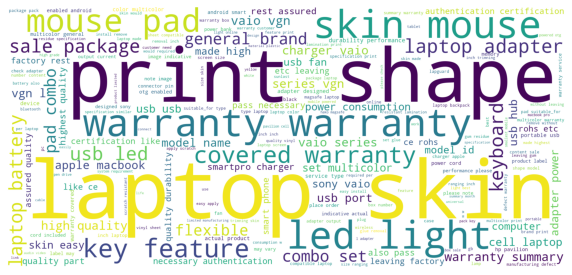

Decor related words:


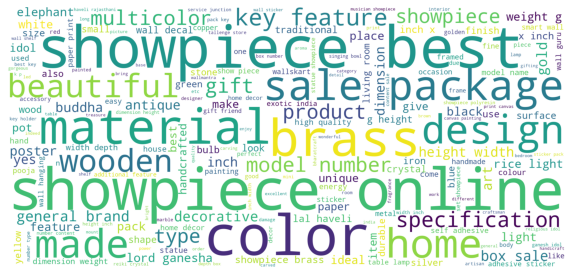

Furnishing related words:


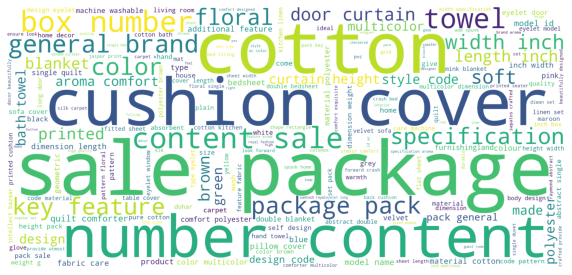

Kitchen related words:


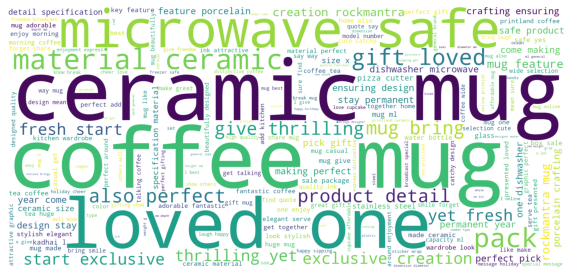

Watches related words:


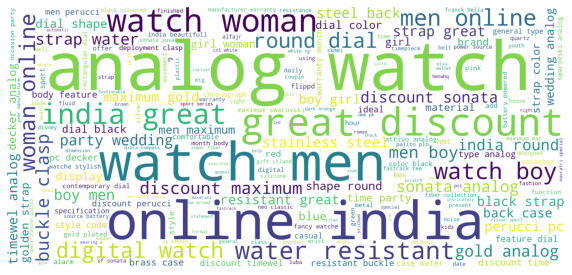

In [108]:
print("Baby related words:")
wordcloud_draw(Baby, 'white')

print("Beauty related words:")
wordcloud_draw(Beauty, 'white')


print("Computers related words:")
wordcloud_draw(Computers, 'white')


print("Decor related words:")
wordcloud_draw(Decor, 'white')


print("Furnishing related words:")
wordcloud_draw(Furnishing, 'white')


print("Kitchen related words:")
wordcloud_draw(Kitchen, 'white')

print("Watches related words:")
wordcloud_draw(Watches, 'white')


# Classifieurs supervisés sur données textuelles

In [109]:
# Creation de features et targets
features = dtm
labels = df_data_1['CategoryId']

In [110]:
# Choisissons les 5 meilleurs modèles en utilisant la validation croisée
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(),
    LinearSVC(),
]

In [111]:
# Creation de nouveau dataset avec des resultats de cross validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [112]:
# Calculons la moyenne et ecart-type pour chaque modèle 
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
print(acc)



                        Mean Accuracy  Standard deviation
model_name                                               
LinearSVC                    0.848571            0.098019
LogisticRegression           0.787619            0.095749
MultinomialNB                0.780952            0.093557
RandomForestClassifier       0.753333            0.114405
SGDClassifier                0.841905            0.082093


#### Le modèle  LinearSVC a les meilleurs résultats par rapport  aux autres algorithmes de classification.Donc, on va le prendre.


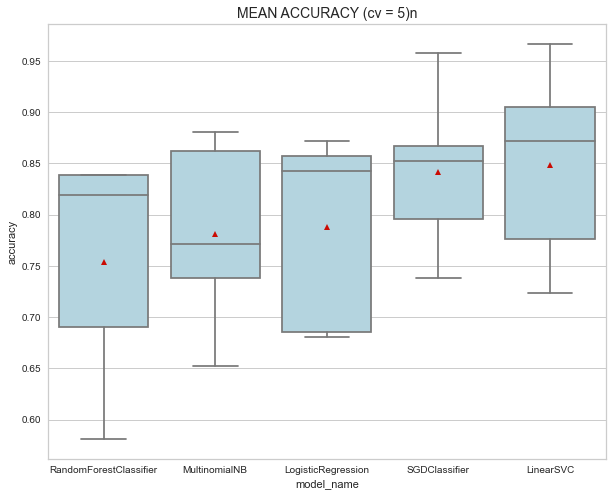

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);
plt.savefig('mes_images/meilleurs_model.png')

In [114]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, 
                                                               df_data_1.index, test_size=0.25, 
                                                               random_state=42)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9201520912547528

In [115]:
# Classification report
print('CLASSIFICATIION METRICS')
print(classification_report(y_test, y_pred, 
                                    target_names= df_data_1['category_general'].unique()))

CLASSIFICATIION METRICS
                            precision    recall  f1-score   support

           Home Furnishing       0.90      0.71      0.79        38
                 Baby Care       0.77      1.00      0.87        27
                   Watches       0.96      0.98      0.97        46
Home Decor & Festive Needs       0.92      0.89      0.91        38
          Kitchen & Dining       0.91      0.93      0.92        45
  Beauty and Personal Care       0.97      0.94      0.95        31
                 Computers       1.00      1.00      1.00        38

                  accuracy                           0.92       263
                 macro avg       0.92      0.92      0.92       263
              weighted avg       0.92      0.92      0.92       263



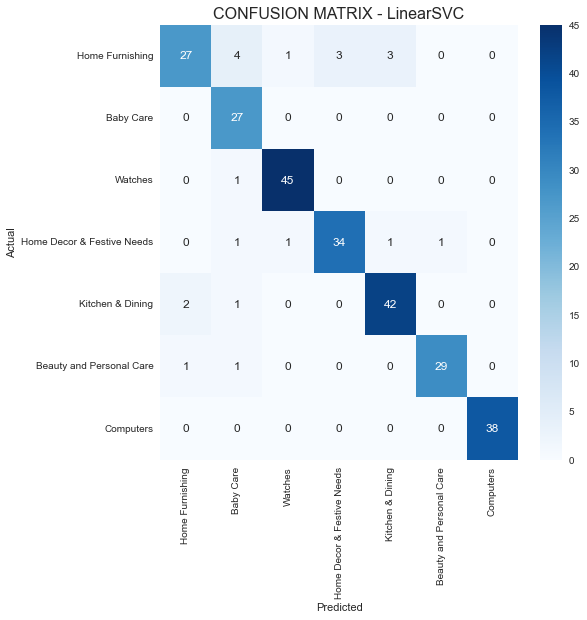

In [116]:
# la matrice de confusion pour vérifier les prédictions
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=df_data_1['category_general'].value_counts().keys(), 
            yticklabels=df_data_1['category_general'].value_counts().keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC", size=16);
plt.savefig('mes_images/confusion matrix.png')

# Prediction

In [117]:
X = df_data_1['description']
y = df_data_1['category_general']

##### Effectuons toutes les étapes nécessaires

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [119]:
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=2,
                        ngram_range=(1, 1), 
                        stop_words=stopwords_combined)

In [120]:
fitted_vectorizer = tf_idf.fit(X_train)
tf_idf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [121]:
model = LinearSVC().fit(tf_idf_vectorizer_vectors, y_train)

##### La prédiction.

In [122]:
# For example la ligne N 227
df_data_1.loc[227,['description','category_general']]

description         rajo raja magan buddha artpiece showpiece onli...
category_general                           Home Decor & Festive Needs
Name: 227, dtype: object

In [123]:
complaint = """Buy Rajo Raja Magan Buddha Artpiece Showpiece  -  20.5 cm for Rs.1799 online. 
Rajo Raja Magan Buddha Artpiece Showpiece  -  20.5 cm at best prices with FREE shipping & cash on delivery. 
Only Genuine Products. 30 Day Replacement Guarantee."""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Home Decor & Festive Needs']


In [124]:
# Exemple sur site d'internet d'Amazon (https://www.amazon.fr/adaptateurs-adaptateur-Thunderbolt-femelle-appareils/dp/B07XYTHCXV/?_encoding=UTF8&pd_rd_w=Zulbs&pf_rd_p=90d0660c-7cf4-4a86-ba22-cf633083f122&pf_rd_r=8HK21DT5E9APK4K4Z8S2&pd_rd_r=71db5c3d-9e53-43da-bff4-33a0ae40f104&pd_rd_wg=38rfW&ref_=pd_gw_unk)
complaint = """USB 3.0 Superspeed Jusqu'à 5 Gbps de transfert de données. Adaptateur rapide USB C vers USB
Adaptateur OTG Plug & Play. Aucun pilote ou logiciel n'est nécessaire. Adaptateur Thunderbolt 3 vers USB simple
Utilisation durable en alliage de zinc pour éviter les rayures. Le connecteur USB C de qualité supérieure a passé plus de 10 000 tests push/pull
Compatibilité universelle compatible avec ordinateur portable/tablette/smartphone avec un port USB de type C, y compris Macbook Pro 2019/2018/2017, MacBook Air 2018, Nintendo Switch, Samsung Galaxy S8/S9
de 1 an Équipez la de 3 ans en vous enregistrant sur le programme adaptateur USB C nonda"""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Computers']
